In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('train_ctrUa4K.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# fill credit history with 0
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [8]:
data['Credit_History'] = data['Credit_History'].fillna(0)

In [9]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data = data[data['LoanAmount'] > 0]

In [12]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           13
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(360)

In [14]:
data['Self_Employed'].value_counts()

No     482
Yes     79
Name: Self_Employed, dtype: int64

In [15]:
data['Self_Employed'].fillna('Yes', inplace= True)

In [16]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           13
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
data.dropna(inplace= True)

In [18]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
data.duplicated().sum()

0

In [20]:
data['Married'] = data['Married'].map({'Yes':1, 'No':0})
data['Education'] = data['Education'].map({'Graduate':1, 'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1, 'No':0})
data['Gender'] = data['Gender'].map({'Female':1, 'Male':0})
data['Property_Area'] = data['Property_Area'].map({'Urban':0, 'Semiurban':1, 'Rural':2})

In [21]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,N
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,Y
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,Y


In [22]:
data['Dependents'].value_counts()

0     327
1      97
2      96
3+     46
Name: Dependents, dtype: int64

In [23]:
data['Dependents'] = data['Dependents'].apply(lambda x: x.replace('+',''))
data['Dependents'] = data['Dependents'].astype('int')

In [24]:
data['Loan_Status'] = data['Loan_Status'].map({'Y':1, 'N':0})

<AxesSubplot:>

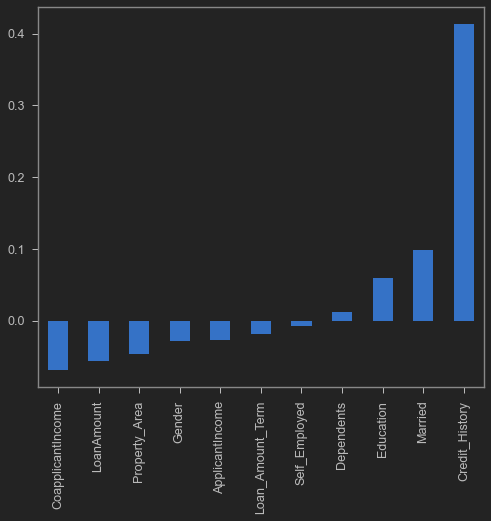

In [25]:
data.corr()['Loan_Status'].sort_values().drop('Loan_Status').plot(kind= 'bar')

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

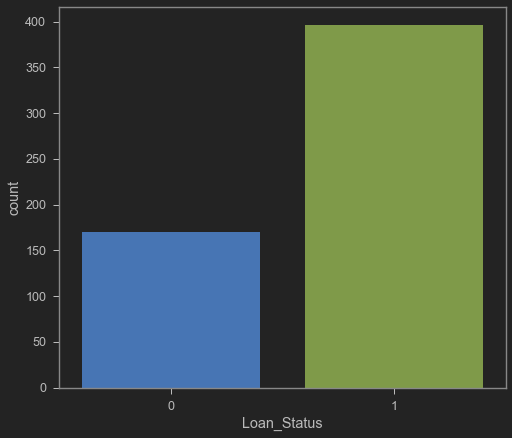

In [27]:
sns.countplot(data['Loan_Status'])

from graph above we can see that most important factor for Loan Approval are credit history

In [29]:
approved = data[data['Loan_Status']==1]
not_approved = data[data['Loan_Status']==0]
print(approved.shape)
print(not_approved.shape)

(396, 13)
(170, 13)


In [32]:
not_approved = not_approved.sample(396, replace= True)

In [33]:
data = pd.concat([approved, not_approved])

In [46]:
x = data.drop(columns= ['Loan_ID', 'Loan_Status'])
y = data['Loan_Status']

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [49]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
x_train.shape

(633, 11)

In [51]:
x_test.shape

(159, 11)

In [52]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVC', SVC()))
models.append(('XGBRFClassifier', XGBRFClassifier(use_label_encoder=False)))

In [53]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    train_pred= model.predict(x_train)
    
    # Make predictions.
    predictions = model.predict(x_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print('train accuracy:', accuracy_score(y_train, train_pred))
    print('test accuracy:', accuracy_score(y_test,predictions))
    print('\n')

LogisticRegression
[[43 20]
 [32 64]]
train accuracy: 0.7014218009478673
test accuracy: 0.6729559748427673


Naive Bayes
[[46 11]
 [29 73]]
train accuracy: 0.6903633491311216
test accuracy: 0.7484276729559748


RandomForest
[[70 20]
 [ 5 64]]
train accuracy: 1.0
test accuracy: 0.8427672955974843


Decision Tree
[[72 21]
 [ 3 63]]
train accuracy: 1.0
test accuracy: 0.8490566037735849


KNN
[[60 31]
 [15 53]]
train accuracy: 0.8104265402843602
test accuracy: 0.710691823899371


SVC
[[53 22]
 [22 62]]
train accuracy: 0.7424960505529226
test accuracy: 0.7232704402515723


XGBRFClassifier
[09:04:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[56 21]
 [19 63]]
train accuracy: 0.8736176935229067
test accuracy: 0.7484276729559748




In [54]:
test = pd.read_csv('test_lAUu6dG.csv')

In [55]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [56]:
test['Married'] = test['Married'].map({'Yes':1, 'No':0})
test['Education'] = test['Education'].map({'Graduate':1, 'Not Graduate':0})
test['Self_Employed'] = test['Self_Employed'].map({'Yes':1, 'No':0})
test['Gender'] = test['Gender'].map({'Female':1, 'Male':0})
test['Property_Area'] = test['Property_Area'].map({'Urban':0, 'Semiurban':1, 'Rural':2})

In [57]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [58]:
test['Dependents'] = test['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [59]:
test = test.fillna(0)

In [60]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,0
1,LP001022,0.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,0
2,LP001031,0.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,0
3,LP001035,0.0,1,2.0,1,0.0,2340,2546,100.0,360.0,0.0,0
4,LP001051,0.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0.0,1,3.0,0,1.0,4009,1777,113.0,360.0,1.0,0
363,LP002975,0.0,1,0.0,1,0.0,4158,709,115.0,360.0,1.0,0
364,LP002980,0.0,0,0.0,1,0.0,3250,1993,126.0,360.0,0.0,1
365,LP002986,0.0,1,0.0,1,0.0,5000,2393,158.0,360.0,1.0,2


In [61]:
pred = scaler.transform(test.iloc[:,1:])

In [69]:
# predict test dataset with Decision Tree Classifier
new_pred = models[3][1].predict(pred)

In [70]:
new_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [71]:
submission = pd.concat([test['Loan_ID'], pd.Series(new_pred)], axis=1)

In [72]:
submission.columns= ['Loan_ID', 'Loan_Status']

In [73]:
submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,0
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,0


In [74]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0:'N'})

In [76]:
submission.to_csv('Decision Tree prediction.csv', index= False)

In [77]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [117]:
model= Sequential()

model.add(Dense(11,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [118]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=200,
          batch_size=256,
          validation_data=(x_test, y_test), verbose=0, callbacks=[EarlyStopping(monitor='val_loss', mode='min', patience=5)]
          )

<AxesSubplot:>

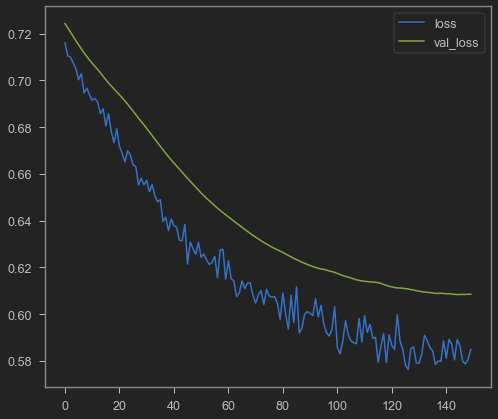

In [119]:
losses= pd.DataFrame(model.history.history)
losses.plot()

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

In [121]:
predictions = model.predict(x_test).astype(int)

In [122]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64        75
           1       0.00      0.00      0.00        84

    accuracy                           0.47       159
   macro avg       0.24      0.50      0.32       159
weighted avg       0.22      0.47      0.30       159



C:\Users\62812\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\62812\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\62812\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
print(confusion_matrix(y_test,predictions))

[[75  0]
 [84  0]]


In [124]:
submission_tensor = pd.concat([test['Loan_ID'], pd.Series(new_pred)], axis=1)
submission_tensor.columns= ['Loan_ID', 'Loan_Status']
submission_tensor['Loan_Status'] = submission_tensor['Loan_Status'].map({1: 'Y', 0:'N'})

In [125]:
submission_tensor

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,N
